In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [4]:
def model_train(model, x, y):
    maximum_epochs = 20000
    epoch_lst,loss_lst=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_func(prediction, y)
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step() 
        epoch_lst.append(epoch)
        loss_lst.append(loss.detach().numpy())
        
        if epoch % 500 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == maximum_epochs:
                print("Maximum Epochs Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_lst[-1] < 0.001):
            if abs(loss_lst[-3] - loss_lst[-2]) < 1.0e-05 and abs(loss_lst[-2] - loss_lst[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_lst[-1])
                not_converged = False
                
    return epoch_lst, loss_lst, prediction

In [5]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = (np.sin(5 * (np.pi) * x)) / (5 * np.pi * x)
print(y.shape)

(300, 1)
(300, 1)


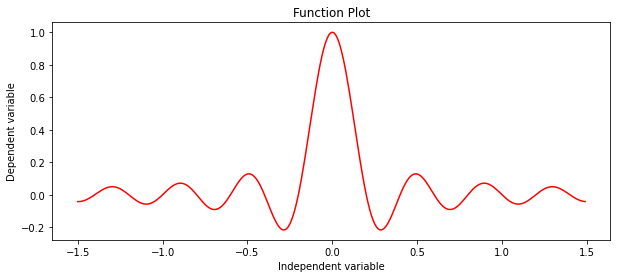

In [6]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [8]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x
 
model1 = Model1()

In [9]:
optimizer = torch.optim.Adam(model1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
total_parameters = sum(p.numel() for p in model1.parameters())
print(total_parameters)
x_tensor = torch.from_numpy(x).float()  
y_tensor = torch.from_numpy(y).float()
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model1, x_tensor, y_tensor)

571
epoch: 500, loss = 0.0048
epoch: 1000, loss = 0.0022
epoch: 1500, loss = 0.0022
epoch: 2000, loss = 0.0022
epoch: 2500, loss = 0.0022
epoch: 3000, loss = 0.0022
epoch: 3500, loss = 0.0022
epoch: 4000, loss = 0.0022
epoch: 4500, loss = 0.0022
epoch: 5000, loss = 0.0014
epoch: 5500, loss = 0.0011
epoch: 6000, loss = 0.0011
epoch: 6500, loss = 0.0011
epoch: 7000, loss = 0.0011
epoch: 7500, loss = 0.0011
epoch: 8000, loss = 0.0010
epoch: 8500, loss = 0.0010
epoch: 9000, loss = 0.0010
epoch: 9500, loss = 0.0011
epoch: 10000, loss = 0.0010
epoch: 10500, loss = 0.0010
epoch: 11000, loss = 0.0011
epoch: 11500, loss = 0.0010
epoch: 12000, loss = 0.0010
epoch: 12500, loss = 0.0010
epoch: 13000, loss = 0.0010
epoch: 13500, loss = 0.0010
epoch: 14000, loss = 0.0010
epoch: 14500, loss = 0.0010
epoch: 15000, loss = 0.0010
epoch: 15500, loss = 0.0010
epoch: 16000, loss = 0.0010
epoch: 16500, loss = 0.0010
epoch: 17000, loss = 0.0010
epoch: 17500, loss = 0.0010
epoch: 18000, loss = 0.0010
epoch: 1

In [10]:
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x
 
model_2 = Model2()

In [11]:
optimizer = torch.optim.Adam(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
x_tensor = torch.from_numpy(x).float()  
y_tensor = torch.from_numpy(y).float()
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_2, x_tensor, y_tensor)

572
epoch: 500, loss = 0.0068
epoch: 1000, loss = 0.0024
epoch: 1500, loss = 0.0014
epoch: 2000, loss = 0.0012
epoch: 2500, loss = 0.0011
epoch: 3000, loss = 0.0011
epoch: 3500, loss = 0.0011
epoch: 4000, loss = 0.0011
epoch: 4500, loss = 0.0011
epoch: 5000, loss = 0.0011
epoch: 5500, loss = 0.0011
epoch: 6000, loss = 0.0011
epoch: 6500, loss = 0.0011
epoch: 7000, loss = 0.0011
epoch: 7500, loss = 0.0011
epoch: 8000, loss = 0.0011
epoch: 8500, loss = 0.0011
epoch: 9000, loss = 0.0011
epoch: 9500, loss = 0.0011
epoch: 10000, loss = 0.0011
epoch: 10500, loss = 0.0011
epoch: 11000, loss = 0.0011
epoch: 11500, loss = 0.0011
epoch: 12000, loss = 0.0011
epoch: 12500, loss = 0.0011
epoch: 13000, loss = 0.0011
epoch: 13500, loss = 0.0011
epoch: 14000, loss = 0.0011
epoch: 14500, loss = 0.0011
epoch: 15000, loss = 0.0011
epoch: 15500, loss = 0.0011
epoch: 16000, loss = 0.0011
epoch: 16500, loss = 0.0011
epoch: 17000, loss = 0.0011
epoch: 17500, loss = 0.0011
epoch: 18000, loss = 0.0011
epoch: 1

In [12]:
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x
 
model_3 = Model3()

In [13]:
optimizer = torch.optim.Adam(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
x_tensor = torch.from_numpy(x).float()  
y_tensor = torch.from_numpy(y).float()
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_3, x_tensor, y_tensor)

571
epoch: 500, loss = 0.0137
epoch: 1000, loss = 0.0044
epoch: 1500, loss = 0.0028
epoch: 2000, loss = 0.0023
epoch: 2500, loss = 0.0020
epoch: 3000, loss = 0.0018
epoch: 3500, loss = 0.0017
epoch: 4000, loss = 0.0016
epoch: 4500, loss = 0.0015
epoch: 5000, loss = 0.0014
epoch: 5500, loss = 0.0014
epoch: 6000, loss = 0.0013
epoch: 6500, loss = 0.0013
epoch: 7000, loss = 0.0013
epoch: 7500, loss = 0.0012
epoch: 8000, loss = 0.0012
epoch: 8500, loss = 0.0012
epoch: 9000, loss = 0.0012
epoch: 9500, loss = 0.0012
epoch: 10000, loss = 0.0012
epoch: 10500, loss = 0.0011
epoch: 11000, loss = 0.0011
epoch: 11500, loss = 0.0011
epoch: 12000, loss = 0.0011
epoch: 12500, loss = 0.0011
epoch: 13000, loss = 0.0011
epoch: 13500, loss = 0.0011
epoch: 14000, loss = 0.0011
epoch: 14500, loss = 0.0011
epoch: 15000, loss = 0.0011
epoch: 15500, loss = 0.0011
epoch: 16000, loss = 0.0011
epoch: 16500, loss = 0.0011
epoch: 17000, loss = 0.0010
epoch: 17500, loss = 0.0010
epoch: 18000, loss = 0.0010
epoch: 1

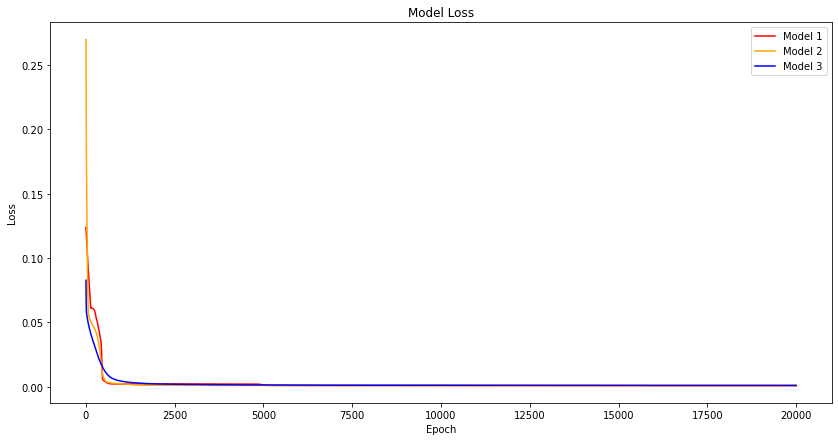

In [14]:
plt.figure(figsize=(14,7))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "orange")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

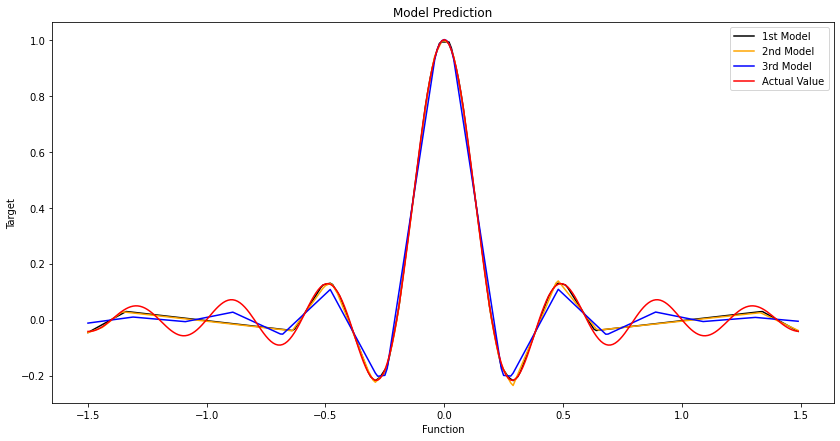

In [15]:
plt.figure(figsize=(14,7))
plt.plot(x, m1_prediction.data, color="black", label = '1st Model')
plt.plot(x, m2_prediction.data, color="orange", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="r", label = 'Actual Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

In [16]:
torch.manual_seed(1)

In [17]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


<ipython-input-25-f3b57164c611>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


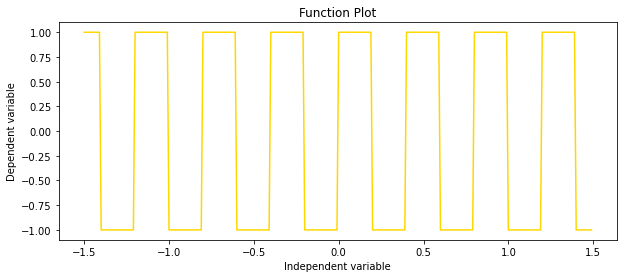

In [25]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "gold")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [19]:
model_sign_1 = Model1()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_sign_1, x, y)

571
epoch: 500, loss = 0.9994
epoch: 1000, loss = 0.5232
epoch: 1500, loss = 0.2714
epoch: 2000, loss = 0.2572
epoch: 2500, loss = 0.2427
epoch: 3000, loss = 0.2398
epoch: 3500, loss = 0.2354
epoch: 4000, loss = 0.2315
epoch: 4500, loss = 0.2287
epoch: 5000, loss = 0.2251
epoch: 5500, loss = 0.3091
epoch: 6000, loss = 0.2195
epoch: 6500, loss = 0.2164
epoch: 7000, loss = 0.2152
epoch: 7500, loss = 0.2129
epoch: 8000, loss = 0.2113
epoch: 8500, loss = 0.2104
epoch: 9000, loss = 0.2094
epoch: 9500, loss = 0.2087
epoch: 10000, loss = 0.2078
epoch: 10500, loss = 0.2080
epoch: 11000, loss = 0.2065
epoch: 11500, loss = 0.2061
epoch: 12000, loss = 0.2056
epoch: 12500, loss = 0.2053
epoch: 13000, loss = 0.2050
epoch: 13500, loss = 0.2041
epoch: 14000, loss = 0.2037
epoch: 14500, loss = 0.2032
epoch: 15000, loss = 0.2026
epoch: 15500, loss = 0.2022
epoch: 16000, loss = 0.2017
epoch: 16500, loss = 0.2012
epoch: 17000, loss = 0.1991
epoch: 17500, loss = 0.1980
epoch: 18000, loss = 0.1977
epoch: 1

In [20]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, x, y)

572
epoch: 500, loss = 0.9944
epoch: 1000, loss = 0.7518
epoch: 1500, loss = 0.3958
epoch: 2000, loss = 0.3489
epoch: 2500, loss = 0.3339
epoch: 3000, loss = 0.3250
epoch: 3500, loss = 0.3182
epoch: 4000, loss = 0.3133
epoch: 4500, loss = 0.3104
epoch: 5000, loss = 0.3068
epoch: 5500, loss = 0.3047
epoch: 6000, loss = 0.3025
epoch: 6500, loss = 0.2996
epoch: 7000, loss = 0.2984
epoch: 7500, loss = 0.2950
epoch: 8000, loss = 0.2939
epoch: 8500, loss = 0.2912
epoch: 9000, loss = 0.2919
epoch: 9500, loss = 0.2905
epoch: 10000, loss = 0.2901
epoch: 10500, loss = 0.2859
epoch: 11000, loss = 0.2857
epoch: 11500, loss = 0.2854
epoch: 12000, loss = 0.2827
epoch: 12500, loss = 0.2820
epoch: 13000, loss = 0.2818
epoch: 13500, loss = 0.2798
epoch: 14000, loss = 0.2864
epoch: 14500, loss = 0.2813
epoch: 15000, loss = 0.2805
epoch: 15500, loss = 0.2784
epoch: 16000, loss = 0.2778
epoch: 16500, loss = 0.2788
epoch: 17000, loss = 0.2743
epoch: 17500, loss = 0.2742
epoch: 18000, loss = 0.2728
epoch: 1

In [21]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, x, y)

571
epoch: 500, loss = 0.9101
epoch: 1000, loss = 0.6966
epoch: 1500, loss = 0.5162
epoch: 2000, loss = 0.3996
epoch: 2500, loss = 0.3293
epoch: 3000, loss = 0.2890
epoch: 3500, loss = 0.2647
epoch: 4000, loss = 0.2494
epoch: 4500, loss = 0.2395
epoch: 5000, loss = 0.2326
epoch: 5500, loss = 0.2278
epoch: 6000, loss = 0.2228
epoch: 6500, loss = 0.2187
epoch: 7000, loss = 0.2157
epoch: 7500, loss = 0.2133
epoch: 8000, loss = 0.2112
epoch: 8500, loss = 0.2095
epoch: 9000, loss = 0.2081
epoch: 9500, loss = 0.2065
epoch: 10000, loss = 0.2047
epoch: 10500, loss = 0.2035
epoch: 11000, loss = 0.2025
epoch: 11500, loss = 0.2015
epoch: 12000, loss = 0.2007
epoch: 12500, loss = 0.1997
epoch: 13000, loss = 0.1989
epoch: 13500, loss = 0.1984
epoch: 14000, loss = 0.1975
epoch: 14500, loss = 0.1969
epoch: 15000, loss = 0.1962
epoch: 15500, loss = 0.1954
epoch: 16000, loss = 0.1945
epoch: 16500, loss = 0.1933
epoch: 17000, loss = 0.1919
epoch: 17500, loss = 0.1911
epoch: 18000, loss = 0.1911
epoch: 1

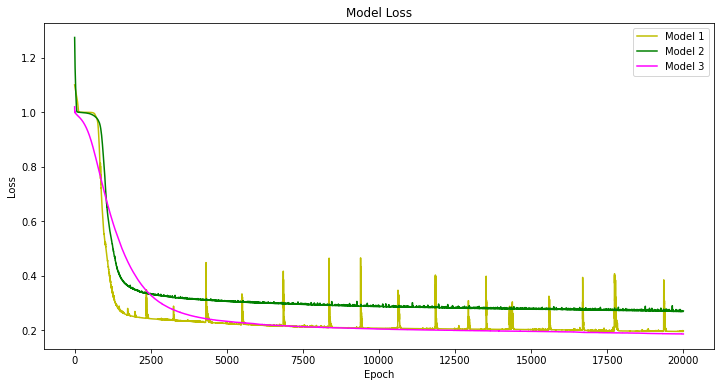

In [27]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "y")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "magenta")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

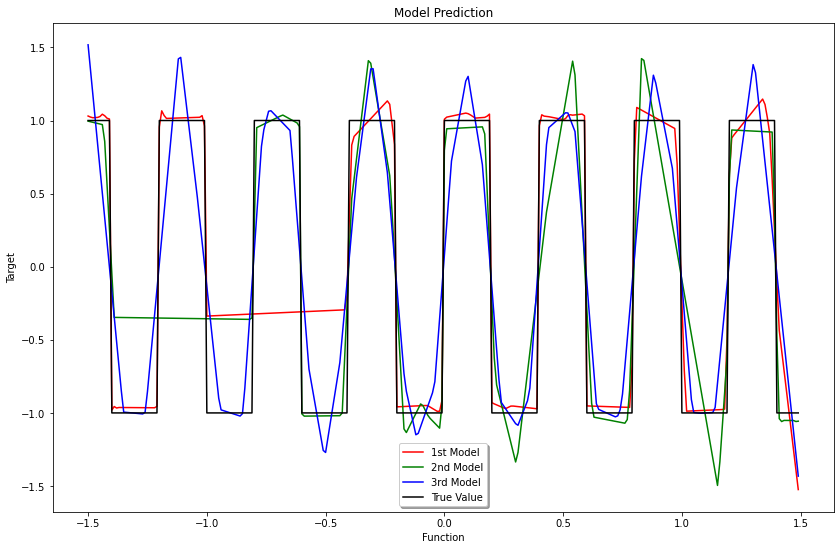

In [37]:
plt.figure(figsize=(14,9))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.15), shadow=True)
plt.show()